## Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Reading Dataset

In [2]:
df = pd.read_csv('./data/wine_data.csv')
print(df.shape)
df.head()

(21000, 12)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


In [3]:
out = df['quality']
inputs = df.drop(columns='quality')
inputs.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0


In [4]:
inputs = inputs.to_numpy()
inputs

array([[11.6  ,  0.58 ,  0.66 , ...,  3.25 ,  0.57 ,  9.   ],
       [10.4  ,  0.61 ,  0.49 , ...,  3.16 ,  0.63 ,  8.4  ],
       [ 7.4  ,  1.185,  0.   , ...,  3.63 ,  0.54 , 10.7  ],
       ...,
       [13.4  ,  0.46 ,  1.04 , ...,  2.89 ,  1.76 ,  9.3  ],
       [ 6.6  ,  1.03 ,  1.09 , ...,  2.94 ,  1.54 , 12.9  ],
       [ 9.3  ,  0.93 ,  1.32 , ...,  3.16 ,  1.42 , 13.   ]])

In [5]:
out = out.to_numpy().reshape(-1,1)
out

array([[3],
       [3],
       [3],
       ...,
       [9],
       [9],
       [9]])

In [6]:
out.shape

(21000, 1)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(inputs, out, test_size=0.2, random_state=42)
x_test, x_dev, y_test, y_dev = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
print(f'x train: {x_train.shape}')
print(f'x test: {x_test.shape}')
print(f'y train: {y_train.shape}')
print(f'y test: {y_test.shape}')
print(f'x dev: {x_dev.shape}')
print(f'y dev: {y_dev.shape}')


x train: (16800, 11)
x test: (2100, 11)
y train: (16800, 1)
y test: (2100, 1)
x dev: (2100, 11)
y dev: (2100, 1)


## normalizing inputs

In [ ]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train_normalized = (x_train - mean)/std
x_test_normalized = (x_test - mean)/std
x_dev_normalized = (x_dev - mean)/std


# since we store each example as a column so lets take the transposes
x_train_normalized = x_train_normalized.Tz
y_train = y_train.T
print(x_train_normalized.shape)

x_dev_normalized = x_dev_normalized.T
y_dev = y_dev.T
print(x_dev_normalized.shape)

x_test_normalized = x_test_normalized.T
y_test = y_test.T
print(x_test_normalized.shape)


(16800, 11)
(2100, 11)
(2100, 11)


In [19]:
from neural import Neural

In [20]:
classifier = Neural(layers_sizes=[4,2,1], activations=['Leaky-ReLU', 'Leaky-ReLU', 'softmax'], cost='CCE')

In [24]:
J_hist, dev_hist = classifier.train(X_train=x_train_normalized, Y_train=y_train, X_dev=x_dev_normalized, Y_dev=y_dev,  epoch=50000, learning_rate=1)

epoch 0: train cost 58.3810 | dev cost 46.0304 | eval 0.0000
epoch 100: train cost 58.3810 | dev cost 46.0304 | eval 0.0000
epoch 200: train cost 58.3810 | dev cost 46.0304 | eval 0.0000
epoch 300: train cost 58.3810 | dev cost 46.0304 | eval 0.0000
epoch 400: train cost 58.3810 | dev cost 46.0304 | eval 0.0000
epoch 500: train cost 58.3810 | dev cost 46.0304 | eval 0.0000
epoch 600: train cost 58.3810 | dev cost 46.0304 | eval 0.0000
epoch 700: train cost 58.3810 | dev cost 46.0304 | eval 0.0000
epoch 800: train cost 58.3810 | dev cost 46.0304 | eval 0.0000
epoch 900: train cost 58.3810 | dev cost 46.0304 | eval 0.0000
epoch 1000: train cost 58.3810 | dev cost 46.0304 | eval 0.0000
epoch 1100: train cost 58.3810 | dev cost 46.0304 | eval 0.0000
epoch 1200: train cost 58.3810 | dev cost 46.0304 | eval 0.0000
epoch 1300: train cost 58.3810 | dev cost 46.0304 | eval 0.0000
epoch 1400: train cost 58.3810 | dev cost 46.0304 | eval 0.0000
epoch 1500: train cost 58.3810 | dev cost 46.0304 | 

KeyboardInterrupt: 

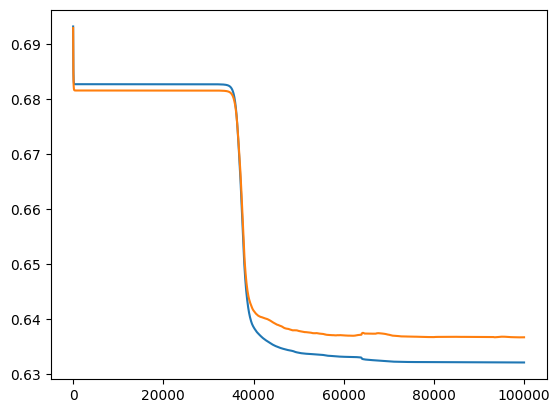

In [29]:
plt.plot(np.arange(100000), J_hist)
plt.plot(np.arange(100000), dev_hist)


In [30]:
evaluate = classifier.evaluate(x_test_normalized, y_test)
evaluate

np.float64(7.321428571428572)

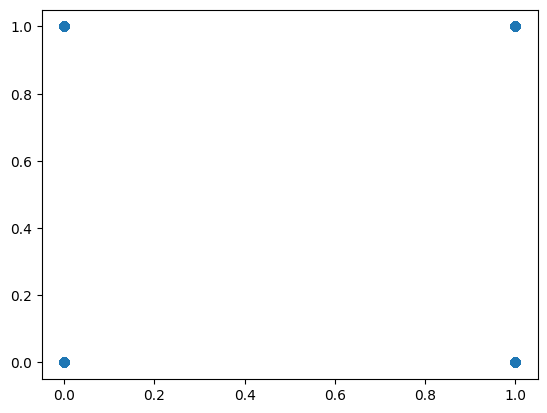

In [32]:
m = x_test_normalized.shape[0]
# for i in range(m):
pred = classifier.predict(x_test_normalized)
plt.scatter(y_test, pred)
plt.show()